# 스트린트 미션 02

 
1. 예약취소와 관련이 있는 요소들을 파악해 보기
2. 예약 취소율을 줄이기 위한 아이디어 생각해 보기
3. 어떤 조건에서 예약 취소가 빈번하게 발생하는지 , 예약 취소와 관련이 있는 요소들이 무엇인지 파악하기
4. 예약 취소율을 개선할 수 있는 아이디어 얻기


In [1488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1489]:
import matplotlib.font_manager as fm

# 모든 컬럼을 다 출력할 수 있도록 설정
pd.set_option('display.max_columns', None)

# 맑은 고딕 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [1490]:
hotel_data_modified_df = pd.read_csv('./data/hotel_data_modified.csv')

In [1491]:
hotel_data_modified_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03


### 중복값 처리

In [1493]:
hotel_data_modified_df.duplicated().sum()

33103

In [1494]:
# 33103개의 중복값

In [1495]:
hotel_data_modified_df = hotel_data_modified_df.drop_duplicates()

In [1496]:
hotel_data_modified_df.duplicated().sum()

0

### 이상치 및 결손값 처리

In [1498]:
hotel_data_modified_df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,86287,86287.000000,86287.000000,86287.000000,86287,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,86283.000000,86287.000000,86287,85836,86287,86287,86287.000000,86287.000000,86287.000000,86287,86287,86287.000000,74299.000000,5172.000000,86287.000000,86287.000000,86287.000000,86287,86287
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,NaN,NaN,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Check-Out,2016-02-14
freq,52913,NaN,NaN,NaN,11136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67155,27178,51231,68276,NaN,NaN,NaN,55722,45596,NaN,NaN,NaN,NaN,NaN,NaN,62398,205
mean,NaN,0.276855,79.200158,2016.211098,NaN,26.834158,15.812985,1.003906,2.621623,1.877328,0.139923,0.010952,NaN,NaN,NaN,NaN,0.039508,0.030306,0.186169,NaN,NaN,0.271524,93.715528,182.740526,0.731605,0.084798,0.700534,NaN,NaN
std,NaN,0.447447,85.434696,0.686709,NaN,13.678594,8.836442,1.031332,2.052188,0.628117,0.457808,0.114268,NaN,NaN,NaN,NaN,0.194801,0.361271,1.742821,NaN,NaN,0.728996,112.953556,131.009213,9.923395,0.282425,0.832575,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,9.000000,47.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,14.000000,169.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,124.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,240.000000,265.000000,0.000000,0.000000,1.000000,NaN,NaN


In [1499]:
hotel_data_modified_df.isna().sum()

C:\Users\82104\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             451
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             11988
company                           81115
days_in_waiting_list                  0


In [1500]:
# children, country, agent, company 컬럼에 결측값이 존재함을 알수있음


## 컬럼을 살펴 보면서 
- 이상치를 살펴보고 
- 결측값이 있는 컬럼은 결측값 처리를 하고 
- 예약 취소율과 연관이 있을만한 부분이 있다면 분석을 한다

## hotel

In [1503]:
hotel_data_modified_df['hotel'].value_counts(dropna=False)

hotel
City Hotel      52913
Resort Hotel    33374
Name: count, dtype: int64

In [1504]:
# 호텔 별 평균 예약 취소율

condition1 = hotel_data_modified_df['hotel'] == 'City Hotel'
condition2 = hotel_data_modified_df['hotel'] == 'Resort Hotel'

# hotel_data_modified_df['is_canceled'].mean()

print(hotel_data_modified_df[condition1]['is_canceled'].mean())
print(hotel_data_modified_df[condition2]['is_canceled'].mean())

#hotel_data_modified_df(by='hotel')['is_canceled'].value_counts()

0.30177839094362446
0.23734044465751783


- <span style="color:blue"> city 호텔의 경우 예약 횟수도 더 많고, 예약 취소율 또 한 더 높다 </span>

## is_canceled

In [1507]:
hotel_data_modified_df['is_canceled'].value_counts(dropna=False)

is_canceled
0    62398
1    23889
Name: count, dtype: int64

## lead_time

In [1509]:
hotel_data_modified_df['lead_time'].value_counts(dropna=False).sort_index(ascending=False)

lead_time
737       1
709       1
629       2
626       1
622       2
       ... 
4      1558
3      1696
2      1921
1      3195
0      5929
Name: count, Length: 479, dtype: int64

<Axes: >

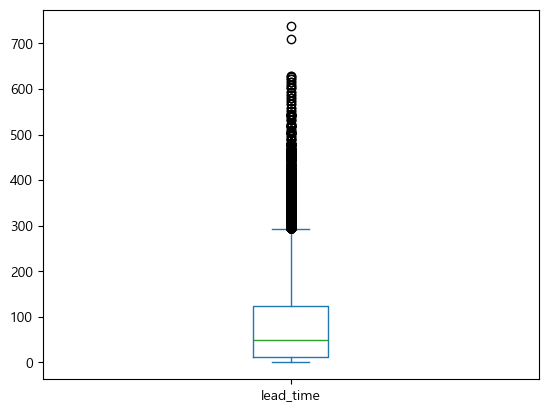

In [1510]:
hotel_data_modified_df['lead_time'].plot(kind = 'box')

In [1511]:
q3 = hotel_data_modified_df['lead_time'].quantile(0.75)
q1 = hotel_data_modified_df['lead_time'].quantile(0.25)
iqr = q3 - q1
hotel_data_modified_df[hotel_data_modified_df['lead_time'] > q3 + 1.5*iqr]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,40.0,NaN,0,0,0,Canceled,2015-05-19
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,40.0,NaN,0,0,0,Check-Out,2015-07-13
85,Resort Hotel,0,324,2015,July,27,3,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,40.0,NaN,0,0,0,Check-Out,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119148,City Hotel,0,457,2017,August,34,25,2,3,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,2,6.0,NaN,0,0,1,Check-Out,2017-08-30
119228,City Hotel,0,341,2017,August,35,27,2,3,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,22.0,NaN,0,0,1,Check-Out,2017-09-01
119296,City Hotel,0,303,2017,August,35,29,0,4,1,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,A,A,0,9.0,NaN,0,0,2,Check-Out,2017-09-02
119297,City Hotel,0,332,2017,August,35,31,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,F,4,9.0,NaN,0,0,2,Check-Out,2017-09-02


In [1512]:
hotel_data_modified_df[hotel_data_modified_df['lead_time'] > q3 + 1.5*iqr].shape[0]

2407

In [1513]:
# 이상치 제거
hotel_data_modified_df = hotel_data_modified_df[hotel_data_modified_df['lead_time'] <= q3 + 1.5 * iqr]

#### stays_in_week_nights = 0 , stays_in_weekend_nights = 0 인 셀 제거

In [1515]:
condition1 = hotel_data_modified_df['stays_in_week_nights'] == 0 
condition2 = hotel_data_modified_df['stays_in_weekend_nights'] == 0

In [1516]:
hotel_data_modified_df[condition1 & condition2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,240.0,NaN,0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,250.0,NaN,0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,NaN,NaN,0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,240.0,NaN,0,0,1,Check-Out,2015-07-07
459,Resort Hotel,0,6,2015,July,29,17,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,14.0,NaN,0,0,0,Check-Out,2017-07-06
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,262.0,NaN,0,0,0,Check-Out,2017-08-08
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,NaN,NaN,0,0,0,Check-Out,2017-08-14
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,98.0,NaN,0,0,0,Check-Out,2017-08-23


In [1517]:
# 삭제
hotel_data_modified_df = hotel_data_modified_df[~(condition1 & condition2)]

In [1518]:
# 확인
hotel_data_modified_df[condition1 & condition2]

C:\Users\82104\AppData\Local\Temp\ipykernel_16248\695792538.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hotel_data_modified_df[condition1 & condition2]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month

In [1520]:
hotel_data_modified_df['arrival_date_year'].value_counts(dropna=False)

arrival_date_year
2016    40485
2017    29918
2015    12833
Name: count, dtype: int64

In [1521]:
hotel_data_modified_df['arrival_date_month'].value_counts(dropna=False)

arrival_date_month
August       10725
July          9500
May           7863
April         7698
March         7291
June          7273
October       6449
September     6197
February      5931
December      4919
November      4837
January       4553
Name: count, dtype: int64

In [1522]:
# arrival_date_month 와 arrival_date_week_number을 통해 맞지 않는 값이 있는지 확인
january_weeks = hotel_data_modified_df.loc[
    hotel_data_modified_df['arrival_date_month'] == 'December', 
    'arrival_date_week_number'
]

unique_weeks = january_weeks.unique()
unique_weeks.sort()
unique_weeks

array([49, 50, 51, 52, 53], dtype=int64)

In [1523]:
# 각 컬럼별 이상치나 결손값 확인

In [1524]:
hotel_data_modified_df['arrival_date_day_of_month'].value_counts(dropna=False).sort_index(ascending=True)

arrival_date_day_of_month
1     2631
2     2906
3     2693
4     2656
5     2833
6     2652
7     2595
8     2680
9     2737
10    2685
11    2776
12    2739
13    2660
14    2550
15    2717
16    2828
17    2890
18    2821
19    2841
20    2781
21    2677
22    2496
23    2633
24    2616
25    2662
26    2804
27    2790
28    2815
29    2758
30    2654
31    1660
Name: count, dtype: int64

In [1525]:
hotel_data_modified_df['arrival_date_week_number'].value_counts(dropna=False).sort_index(ascending=False)

arrival_date_week_number
53    1350
52    1011
51     760
50    1016
49    1135
48    1149
47    1262
46    1101
45    1276
44    1487
43    1519
42    1250
41    1547
40    1330
39    1479
38    1483
37    1381
36    1536
35    2034
34    2384
33    2676
32    2308
31    2147
30    2206
29    2092
28    2226
27    2057
26    1580
25    1683
24    1650
23    1770
22    1607
21    1894
20    1732
19    1709
18    2029
17    1811
16    1693
15    1949
14    1649
13    1778
12    1523
11    1618
10    1553
9     1527
8     1481
7     1593
6     1275
5     1070
4     1094
3     1015
2      919
1      832
Name: count, dtype: int64

In [1526]:
hotel_data_modified_df['arrival_date_day_of_month'].value_counts(dropna=False)

arrival_date_day_of_month
2     2906
17    2890
19    2841
5     2833
16    2828
18    2821
28    2815
26    2804
27    2790
20    2781
11    2776
29    2758
12    2739
9     2737
15    2717
3     2693
10    2685
8     2680
21    2677
25    2662
13    2660
4     2656
30    2654
6     2652
23    2633
1     2631
24    2616
7     2595
14    2550
22    2496
31    1660
Name: count, dtype: int64

## adult

In [1528]:
hotel_data_modified_df['adults'].value_counts(dropna=False).sort_index(ascending=False)

adults
4       58
3     5787
2    61419
1    15665
0      307
Name: count, dtype: int64

In [1529]:
hotel_data_modified_df[hotel_data_modified_df['adults'] == 55]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [1530]:
# 성인 55명에 A등급방 예약, 예약 자체에 문제가 있음, 결국 예약 취소가 됨

In [1531]:
hotel_data_modified_df[hotel_data_modified_df['adults'] == 50]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [1532]:
# 성인 50명에 A등급방 예약, 예약 자체에 문제가 있음, 결국 예약 취소가 됨

In [1533]:
hotel_data_modified_df[hotel_data_modified_df['adults'] == 6]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


- <span style="color:blue">adult 값이 5이상인 데이터에서 모두 예약 취소가 되었음을 확인할수 있음
- <span style="color:blue">예약 하고자 하는 방의 등급 별 인원 제한을 두고 예약을 받아야 할것 같고,
- <span style="color:blue">예약한 방의 등급별 평균 인원수를 구할 필요를 느낌

In [1535]:
# 총 예약 인원수 계산
hotel_data_modified_df['total_people'] = hotel_data_modified_df['adults'] + hotel_data_modified_df['children'] + hotel_data_modified_df['babies']

# reserved_room_type별 평균 인원 수 계산
room_type_avg_people = hotel_data_modified_df.groupby('reserved_room_type')['total_people'].mean().reset_index()

room_type_avg_people

,reserved_room_type,total_people
0,A,1.831531
1,B,2.153846
2,C,3.394589
3,D,2.161233
4,E,2.102675
5,F,3.046705
6,G,3.383988
7,H,3.709964
8,L,2.166667
9,P,0.000000


In [1536]:
hotel_data_modified_df['reserved_room_type'].value_counts()

reserved_room_type
A    53535
D    16839
E     5756
F     2762
G     1961
B      927
C      887
H      562
L        6
P        1
Name: count, dtype: int64

- 등급이 뒤로 갈수록 평균 예약 인원이 커지지 않음
- 방마다 크게 평균 예약 인원수가 차이가 나지 않음
- 평균적으로 A 다음으로 D 룸을 많이 예약함
- adult 값이 5이상인 데이터를 쓰래기 값으로 잡고 모두 삭제 

In [1538]:
hotel_data_modified_df = hotel_data_modified_df[hotel_data_modified_df['adults'] < 5]

In [1539]:
# adult가 0일때 children , babies 컬럼 확인
hotel_data_modified_df.loc[hotel_data_modified_df['adults'] == 0, ['adults', 'children', 'babies']]

,adults,children,babies
2224,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
31765,0,0.0,0
...,...,...,...
117087,0,0.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [1540]:
# adult = 0, children = 0 일때 컬럼 확인
hotel_data_modified_df.loc[(hotel_data_modified_df['adults'] == 0) & (hotel_data_modified_df['children'] == 0), ['adults', 'children', 'babies']]

,adults,children,babies
2224,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
31765,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [1541]:
hotel_data_modified_df.loc[(hotel_data_modified_df['adults'] == 0) & (hotel_data_modified_df['children'] == 0) & ~(hotel_data_modified_df['babies'] == 0), ['adults', 'children', 'babies']]

,adults,children,babies


In [1542]:
# adults = 0 ,	children = 0 인 컬럼 삭제
hotel_data_modified_df = hotel_data_modified_df[~((hotel_data_modified_df['adults'] == 0) & (hotel_data_modified_df['children'] == 0))]

In [1543]:
# 확인
hotel_data_modified_df.loc[(hotel_data_modified_df['adults'] == 0) & (hotel_data_modified_df['children'] == 0), ['adults', 'children', 'babies']]

,adults,children,babies


In [1544]:
# childern 만 호텔에 방문한 경우 데이터 살펴보기
condition = hotel_data_modified_df['adults'] == 0
print(hotel_data_modified_df[condition].shape[0])
print(hotel_data_modified_df[condition]['is_canceled'].mean())
print(hotel_data_modified_df['is_canceled'].mean())

203
0.35960591133004927
0.2730356541404032


In [1545]:
hotel_data_modified_df[(hotel_data_modified_df['is_canceled'] == 0) & (hotel_data_modified_df['adults'] == 0)].shape[0]

130

- <span style="color:blue"> children 의 기준을 만 3세 ~ 17세로 봄
- <span style="color:blue"> 어른없이 children 만 예약 한 경우의 예약 취소율이 평균 취소율 보다 높다
- <span style="color:blue"> adult가 0인 예약의 경우 어른의 동의가 있어야 호텔 예약이 가능하게 함으로써 어른과 상의되지 않은 예약이 추후에 취소되는 경우를 줄일수 있음

## reserved_room_type , assigned_room_type

In [1548]:
hotel_data_modified_df['reserved_room_type'].value_counts(dropna=False).sort_index(ascending=False)

reserved_room_type
L        6
H      562
G     1959
F     2759
E     5744
D    16827
C      887
B      924
A    53464
Name: count, dtype: int64

In [1549]:
hotel_data_modified_df['assigned_room_type'].value_counts(dropna=False).sort_index(ascending=False)

assigned_room_type
L        1
K      123
I      211
H      670
G     2395
F     3535
E     6854
D    21752
C     2041
B     1699
A    43851
Name: count, dtype: int64

- reserved_room_type 과 assigned_room_type 이 다른 경우
- reserved_room_type 과 assigned_room_type 이 같은 경우
- 각 경우의 평균 is_canceled 값은?

In [1551]:
# 같은 방 등급 배정 여부 (문자열로 비교)
same_room = hotel_data_modified_df[hotel_data_modified_df['reserved_room_type'] == hotel_data_modified_df['assigned_room_type']]
changed_room = hotel_data_modified_df[hotel_data_modified_df['reserved_room_type'] != hotel_data_modified_df['assigned_room_type']]

# 결과 출력
print(" 같은 방 등급 배정된 사람 수:", same_room.shape[0])
print(" 취소율:", same_room['is_canceled'].mean())

print(" 다른 방 등급 배정된 사람 수:", changed_room.shape[0])
print(" 취소율:", changed_room['is_canceled'].mean())

 같은 방 등급 배정된 사람 수: 70867
 취소율: 0.3120211099665571
 다른 방 등급 배정된 사람 수: 12265
 취소율: 0.04777823073787199


- <span style="color:blue"> 대부분의 사람들이 예약한대로 방을 배정 받는다
- <span style="color:blue"> 예약한 방 그대로 배정을 받은경우 31%의 확률로 예약을 취소한다
- <span style="color:blue"> 예약한 방과 다른방에 배치받은 사람들의 경우 예약 취소율이 4%로 매우 낮다
- <span style="color:blue"> 고객의 의견에 맞추기보다 고객의 조건이나 상황에 맞는 방을 설명드리고 예약을 바꿔드림으로써 예약 취소율을 낮출수 있다

## booking_changes

In [1554]:
hotel_data_modified_df['booking_changes'].value_counts(dropna=False).sort_index(ascending=False)

booking_changes
17        2
16        1
15        2
14        2
13        5
12        1
11        1
10        6
9         8
8        14
7        27
6        50
5       105
4       333
3       807
2      3253
1     10131
0     68384
Name: count, dtype: int64

In [1555]:
hotel_data_modified_df[hotel_data_modified_df['booking_changes'] == 16]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
9106,Resort Hotel,1,206,2016,October,44,27,2,5,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,16,240.0,NaN,0,0,1,Canceled,2016-07-25,2.0


상관계수: -0.09048857160149361


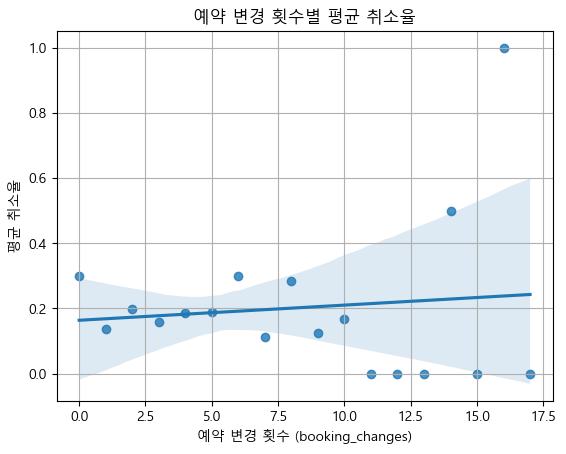

In [1556]:
# booking_changes 와 is_canceled 의 관계

correlation = hotel_data_modified_df['booking_changes'].corr(hotel_data_modified_df['is_canceled'])
print("상관계수:", correlation)

# book_changes 별 평균 is_canceled

grouped = hotel_data_modified_df.groupby('booking_changes')['is_canceled'].mean().reset_index()

sns.regplot(data=grouped, x='booking_changes', y='is_canceled')
plt.title("예약 변경 횟수별 평균 취소율")
plt.ylabel("평균 취소율")
plt.xlabel("예약 변경 횟수 (booking_changes)")
plt.grid(True)
plt.show()

- <span style="color:blue"> 예약 변경 횟수와 평균 취소율관에는 큰 연관성이 없다

## agent

In [1559]:
hotel_data_modified_df['agent'].value_counts(dropna=False)

agent
9.0      28015
240.0    12382
NaN      11530
14.0      3286
7.0       3251
         ...  
337.0        1
510.0        1
165.0        1
358.0        1
449.0        1
Name: count, Length: 333, dtype: int64

In [1560]:
hotel_data_modified_df['agent'].shape[0]
hotel_data_modified_df['agent'].isna().sum()

print("결손률: ", hotel_data_modified_df['agent'].isna().sum() / hotel_data_modified_df['agent'].shape[0] * 100)

결손률:  13.869508733099167


- <span style="color:blue">결손률이 높기때문에 데이터를 버리지 않고 Unknwon 값을 넣음

In [1562]:
hotel_data_modified_df['agent'] = hotel_data_modified_df['agent'].fillna('unknown').astype(str)

In [1563]:
hotel_data_modified_df['agent'].isna().sum()

0

In [1564]:
hotel_data_modified_df['agent'].value_counts(dropna=False)

agent
9.0        28015
240.0      12382
unknown    11530
14.0        3286
7.0         3251
           ...  
337.0          1
510.0          1
165.0          1
358.0          1
449.0          1
Name: count, Length: 333, dtype: int64

In [1565]:
hotel_data_modified_df['agent'].dtype

dtype('O')

In [1566]:
agent_rate_by_country = hotel_data_modified_df.groupby('agent')['is_canceled'].mean().sort_values(ascending=False)
agent_rate_by_country = (agent_rate_by_country * 100).round(2)
agent_rate_by_country

agent
41.0     100.0
236.0    100.0
287.0    100.0
403.0    100.0
235.0    100.0
         ...  
232.0      0.0
227.0      0.0
414.0      0.0
416.0      0.0
321.0      0.0
Name: is_canceled, Length: 333, dtype: float64

In [1567]:
hotel_data_modified_df[hotel_data_modified_df['agent'] == '236.0']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
52761,City Hotel,1,69,2016,June,25,12,2,4,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,236.0,NaN,0,0,0,Canceled,2016-05-04,1.0
52762,City Hotel,1,69,2016,June,25,12,2,4,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,236.0,NaN,0,0,0,Canceled,2016-04-27,1.0
52871,City Hotel,1,71,2016,June,25,14,0,3,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,236.0,NaN,0,0,0,Canceled,2016-04-27,1.0
52948,City Hotel,1,95,2016,June,25,14,0,3,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,236.0,NaN,24,0,0,Canceled,2016-04-27,1.0
59694,City Hotel,1,166,2016,November,45,1,0,3,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,236.0,NaN,0,0,0,Canceled,2016-07-13,1.0
59721,City Hotel,1,166,2016,November,45,1,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,E,E,0,236.0,NaN,0,0,0,Canceled,2016-07-13,2.0


In [1568]:
hotel_data_modified_df['agent'] = hotel_data_modified_df['agent'].str.split('.').str[0]

In [1569]:
hotel_data_modified_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,unknown,NaN,0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304,NaN,0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240,NaN,0,0,1,Check-Out,2015-07-03,2.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,unknown,NaN,0,0,0,Check-Out,2015-07-03,2.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,303,NaN,0,0,1,Check-Out,2015-07-03,2.0


In [1570]:
agent_rate_by_country = hotel_data_modified_df.groupby('agent')['is_canceled'].mean().sort_values(ascending=False)
agent_rate_by_country = (agent_rate_by_country * 100).round(2)
agent_rate_by_country

is_canceled_mean = hotel_data_modified_df['is_canceled'].mean()
print(is_canceled_mean)

high_cancel_agents = agent_rate_by_country[agent_rate_by_country > 30]
agent_counts = hotel_data_modified_df['agent'].value_counts()

high_cancel_df = pd.DataFrame({
    'cancel_rate': high_cancel_agents,
    'reservation_count': agent_counts[high_cancel_agents.index]})

high_cancel_df_sorted = high_cancel_df.sort_values(by='reservation_count', ascending=False)
print(high_cancel_df_sorted)

0.2730356541404032
       cancel_rate  reservation_count
agent                                
9            39.91              28015
240          37.34              12382
242          33.14                682
86           30.51                177
134          31.58                152
...            ...                ...
291         100.00                  1
93          100.00                  1
472         100.00                  1
257         100.00                  1
483         100.00                  1

[72 rows x 2 columns]


- <span style="color:blue"> agent 중에서 cancel_rate 가 높으며 reservation_count 가 많은 회사와 커뮤니케이션을 통해 예약 취소율이 높은 이유를 분석하고 원인을 개선하던가 아니면 계약 취소율이 높은 agent를 통한 예약을 받지 않는다면 예약 취소율을 낮출수 있음
- <span style="color:blue"> 9번 agent 같은 경우 계약 건수도 많고 예약 취소율도 평균보다 10% 이상 높음

## company

In [1573]:
hotel_data_modified_df['company'].value_counts(dropna=False)

company
NaN      78161
40.0       841
223.0      342
45.0       230
153.0      200
         ...  
96.0         1
76.0         1
184.0        1
54.0         1
376.0        1
Name: count, Length: 348, dtype: int64

In [1574]:
print(hotel_data_modified_df['company'].shape[0])
print(hotel_data_modified_df['company'].isna().sum())
print('결손률 :', hotel_data_modified_df['company'].isna().sum() / hotel_data_modified_df['company'].shape[0] * 100)

83132
78161
결손률 : 94.02035317326661


In [1575]:
# 결손이 있고 없고의 유무와 가장 관련이 깊은 데이터를 찾고싶다 
# 결측 여부 이진 컬럼 생성
hotel_data_modified_df['company_isnull'] = hotel_data_modified_df['company'].isnull().astype(int)

# 수치형 변수들과의 상관관계 분석
correlation_with_company = hotel_data_modified_df.corr(numeric_only=True)['company_isnull'].sort_values(key=abs, ascending=False)
correlation_with_company


company_isnull                    1.000000
is_repeated_guest                -0.381366
previous_bookings_not_canceled   -0.316750
adults                            0.310544
total_people                      0.268361
lead_time                         0.145640
stays_in_weekend_nights           0.122435
total_of_special_requests         0.115778
stays_in_week_nights              0.110283
previous_cancellations           -0.104283
is_canceled                       0.091810
booking_changes                  -0.069252
children                          0.065890
required_car_parking_spaces      -0.044901
babies                            0.017593
arrival_date_week_number          0.014054
arrival_date_year                 0.013380
days_in_waiting_list              0.010140
arrival_date_day_of_month         0.004488
company                                NaN
Name: company_isnull, dtype: float64

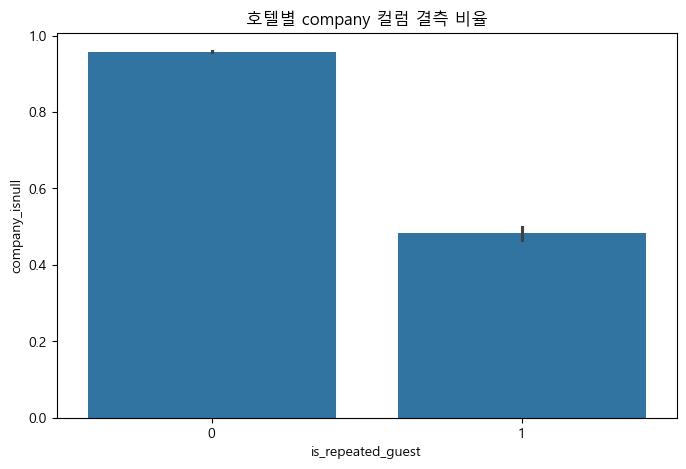

In [1576]:
plt.figure(figsize=(8,5))
sns.barplot(data=hotel_data_modified_df, x='is_repeated_guest', y='company_isnull')
plt.title("호텔별 company 컬럼 결측 비율")
plt.show()

- 첫 방문한 고객 (is_repeated_gest == 0)의 경우 company 칸이 null일 확률이 90프로가 넘고, 
- 재방문 고객의경우 50 % 정도가 company 정보를 입력하지 않았고, 재방문 고객의 경우 company 정보가 있을 확률이 상대적으로 높다.
- 회사와의 제휴나 단체 고객 등이 재방문 고객일 가능성이 높다고 추측해볼 수 있다.
- 하지만 예약 취소율과는 연관이 없기 때문에 컬럼을 삭제 한다.

In [1578]:
hotel_data_modified_df = hotel_data_modified_df.drop('company', axis=1)
hotel_data_modified_df = hotel_data_modified_df.drop('company_isnull', axis=1)

## days_in_waiting_list

In [1580]:
hotel_data_modified_df['days_in_waiting_list'].value_counts(dropna=False).sort_index(ascending=True)

days_in_waiting_list
0      82415
1         12
2          5
3          2
4         15
       ...  
193        1
223        1
224        4
236        4
259        9
Name: count, Length: 113, dtype: int64

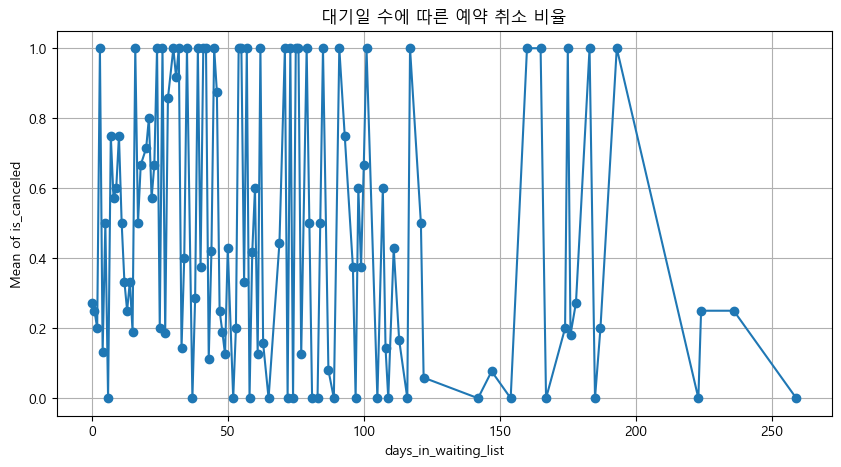

In [1581]:
waiting_cancel_mean = hotel_data_modified_df.groupby('days_in_waiting_list')['is_canceled'].mean().reset_index()

# grouped = hotel_data_modified_df.groupby('booking_changes')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(waiting_cancel_mean['days_in_waiting_list'], waiting_cancel_mean['is_canceled'], marker='o')
plt.xlabel('days_in_waiting_list')
plt.ylabel('Mean of is_canceled')
plt.title('대기일 수에 따른 예약 취소 비율')
plt.grid(True)
plt.show()

In [1582]:
hotel_data_modified_df[['days_in_waiting_list', 'is_canceled']].corr()

,days_in_waiting_list,is_canceled
days_in_waiting_list,1.000000,0.003738
is_canceled,0.003738,1.000000


- days_in_waiting_list 와 is_canceled 는 거의 연관성이 없다.

## required_car_parking_spaces

In [1585]:
hotel_data_modified_df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    75978
1     7122
2       27
3        3
8        2
Name: count, dtype: int64

In [1586]:
hotel_data_modified_df.loc[hotel_data_modified_df['required_car_parking_spaces'] == 8 ,['adults','children','babies']]

,adults,children,babies
29045,2,0.0,0
29046,2,0.0,0


In [1587]:
hotel_data_modified_df.loc[hotel_data_modified_df['required_car_parking_spaces'] == 8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,unknown,0,8,1,Check-Out,2017-03-19,2.0
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,unknown,122,8,0,Check-Out,2017-03-23,2.0


In [1588]:
hotel_data_modified_df['required_car_parking_spaces'].describe()

count    83132.000000
mean         0.086621
std          0.285188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

In [1589]:
q1 = hotel_data_modified_df['required_car_parking_spaces'].quantile(0.25)
q3 = hotel_data_modified_df['required_car_parking_spaces'].quantile(0.75)

iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

condition1 =  hotel_data_modified_df['required_car_parking_spaces'] < lower_limit
condition2 =  hotel_data_modified_df['required_car_parking_spaces'] > upper_limit

outliers = hotel_data_modified_df[condition2]
outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,5,0,1,0,Check-Out,2015-07-08,2.0
29,Resort Hotel,0,99,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,240,0,1,1,Check-Out,2015-07-08,2.0
53,Resort Hotel,0,3,2015,July,27,2,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,C,0,240,0,1,0,Check-Out,2015-07-03,2.0
54,Resort Hotel,0,1,2015,July,27,2,0,1,2,0.0,0,BB,ARG,Online TA,TA/TO,0,0,0,H,H,0,240,0,1,0,Check-Out,2015-07-03,2.0
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,unknown,0,1,2,Check-Out,2015-07-03,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119158,City Hotel,0,180,2017,August,34,25,2,4,3,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,D,0,9,0,1,0,Check-Out,2017-08-31,3.0
119198,City Hotel,0,27,2017,August,35,28,1,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,D,D,2,14,0,1,0,Check-Out,2017-09-01,2.0
119236,City Hotel,0,216,2017,August,35,31,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,168,0,1,0,Check-Out,2017-09-01,2.0
119281,City Hotel,0,158,2017,August,35,31,0,2,2,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,D,D,2,83,0,1,0,Check-Out,2017-09-02,2.0


In [1590]:
hotel_data_modified_df.loc[hotel_data_modified_df['required_car_parking_spaces'] == 3 ,['adults','children','babies']]

,adults,children,babies
38117,2,0.0,0
102762,1,0.0,0
110812,2,0.0,0


- 방문하는 adults 수보다 더많은 주차공간을 필요하다고 한 데이터 삭제

In [1592]:
condition1 = hotel_data_modified_df['adults'] < hotel_data_modified_df['required_car_parking_spaces']
hotel_data_modified_df[condition1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
14039,Resort Hotel,0,74,2017,July,26,1,9,21,1,0.0,0,HB,PRT,Direct,Direct,0,0,2,E,E,0,unknown,0,2,3,Check-Out,2017-07-31,1.0
16656,Resort Hotel,0,199,2015,September,36,3,0,3,1,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,240,0,2,2,Check-Out,2015-09-06,1.0
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,unknown,0,8,1,Check-Out,2017-03-19,2.0
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,unknown,122,8,0,Check-Out,2017-03-23,2.0
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,250,0,3,0,Check-Out,2017-07-09,2.0
86799,City Hotel,0,0,2016,April,15,8,0,1,0,2.0,0,BB,FRA,Online TA,TA/TO,0,0,0,F,B,0,9,0,1,0,Check-Out,2016-04-09,2.0
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,9,0,3,0,Check-Out,2016-12-06,1.0
104879,City Hotel,0,16,2017,January,3,20,2,2,0,2.0,0,BB,PRT,Direct,Direct,0,0,0,B,B,1,unknown,0,1,1,Check-Out,2017-01-24,2.0
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,9,0,3,2,Check-Out,2017-05-02,2.0


In [1593]:
hotel_data_modified_df = hotel_data_modified_df[~condition1]

In [1594]:
hotel_data_modified_df[['required_car_parking_spaces', 'is_canceled']].corr()

,required_car_parking_spaces,is_canceled
required_car_parking_spaces,1.000000,-0.187595
is_canceled,-0.187595,1.000000


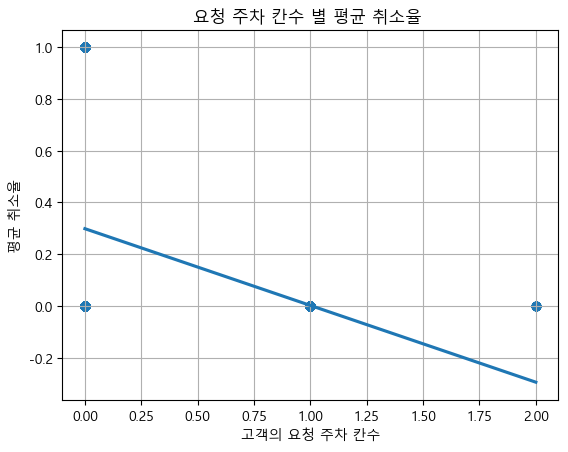

In [1595]:
sns.regplot(data=hotel_data_modified_df, x='required_car_parking_spaces', y='is_canceled')
plt.title(" 요청 주차 칸수 별 평균 취소율  ")
plt.ylabel(" 평균 취소율 ")
plt.xlabel(" 고객의 요청 주차 칸수 ")
plt.grid(True)
plt.show()

- <span style="color:blue"> 고객 들의 주차 요청 칸수가 많을수록 평균적인 예약 취소율 약간의 영향을 끼친다
- <span style="color:blue"> 즉 차를 가지고 오는 고객들이 평균적인 예약 취소율이 낮다는 것을 알수있고 , 차를 가지고 방문이 가능한 고객 (가까운 지역에 산다던가) 이 예약 취소를 더 적게 한다

## total_of_special_requests

In [1598]:
hotel_data_modified_df['total_of_special_requests'].value_counts(dropna=False)

total_of_special_requests
0    41424
1    27844
2    11302
3     2212
4      305
5       36
Name: count, dtype: int64

In [1599]:
hotel_data_modified_df[['total_of_special_requests', 'is_canceled']].corr()

,total_of_special_requests,is_canceled
total_of_special_requests,1.000000,-0.122848
is_canceled,-0.122848,1.000000


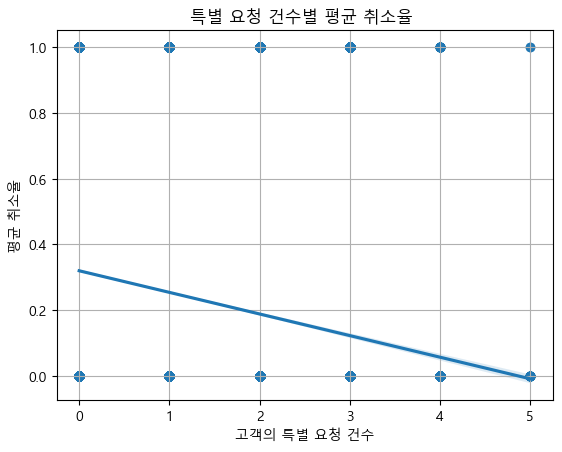

In [1600]:
sns.regplot(data=hotel_data_modified_df, x='total_of_special_requests', y='is_canceled')
# sns.regplot(data=hotel_data_modified_df, x='total_of_special_requests', y='is_canceled', logistic=True, y_jitter=0.03)
plt.title(" 특별 요청 건수별 평균 취소율  ")
plt.ylabel(" 평균 취소율 ")
plt.xlabel(" 고객의 특별 요청 건수 ")
plt.grid(True)
plt.show()

- <span style="color:blue">고객의 특별 요청 건수가 많아질수록 평균 취소율이 낮아지는것을 볼수있다.
- <span style="color:blue">고객들이 특별히 요구하는 사항이 있을때 편하게 말할 수 있는 소통 창구가 있다면 평균 취소율을 낮추는데 도움이 될것이다.

## reservation_status

In [1603]:
hotel_data_modified_df['reservation_status'].value_counts()

reservation_status
Check-Out    60425
Canceled     21718
No-Show        980
Name: count, dtype: int64

In [1604]:
condition1 = hotel_data_modified_df['reservation_status'] == 'Check-Out'
condition2 = hotel_data_modified_df['is_canceled'] == 0
hotel_data_modified_df[condition1 & ~condition2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people


In [1605]:
hotel_data_modified_df[~condition1 & condition2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people


## meal

In [1607]:
hotel_data_modified_df['meal'].value_counts()

meal
BB           64803
SC            9168
HB            8345
Undefined      459
FB             348
Name: count, dtype: int64

In [1608]:
# 식사 유형별 예약 취소율

meal_cancel_rate = hotel_data_modified_df.groupby('meal')['is_canceled'].mean()
meal_cancel_rate

meal
BB           0.262488
FB           0.267241
HB           0.271061
SC           0.355039
Undefined    0.169935
Name: is_canceled, dtype: float64

- <span style="color:blue"> 식사가 포함되지 않은 옵션을 선택한 경우 예약 취소율이 평균보다 높다
- <span style="color:blue"> 고객분들이 호텔을 알아보고 예약을 할때 호텔의 식사에 대한 더 많은 정보를 주고, 호텔의 식사를 선택할수 있도록 유도한다면 평균 취소율을 낮출수 있다. 

In [1610]:
# Undefined 데이터는 삭제한다

hotel_data_modified_df = hotel_data_modified_df[hotel_data_modified_df['meal'] != 'Undefined']

## reservation_status_date

In [1612]:
hotel_data_modified_df['reservation_status_date'].value_counts()

reservation_status_date
2016-02-14    200
2017-05-25    199
2016-03-28    194
2016-10-06    181
2017-02-15    178
             ... 
2015-02-06      1
2015-02-09      1
2015-02-12      1
2015-02-19      1
2015-02-24      1
Name: count, Length: 922, dtype: int64

In [1613]:
hotel_data_modified_df['reservation_status_date'].dtype

dtype('O')

In [1614]:
# 1. 날짜 형식으로 변환
hotel_data_modified_df['reservation_status_date'] = pd.to_datetime(hotel_data_modified_df['reservation_status_date'])

# 2. 연도와 월 컬럼 추가
hotel_data_modified_df['year'] = hotel_data_modified_df['reservation_status_date'].dt.year
hotel_data_modified_df['month'] = hotel_data_modified_df['reservation_status_date'].dt.month

# 3. 취소 or 노쇼 (Check-Out이 아닌 예약)
canceled_df = hotel_data_modified_df[hotel_data_modified_df['reservation_status'] != 'Check-Out'].copy()
not_canceled_df = hotel_data_modified_df[hotel_data_modified_df['reservation_status'] == 'Check-Out'].copy()

# 4. 연도 수 계산 (평균 내기 위해)
n_years = hotel_data_modified_df['year'].nunique()

# 5. 월별 평균 취소/노쇼 횟수
monthly_cancel = canceled_df.groupby('month').size().reset_index(name='cancel_count')
monthly_cancel['avg_cancel'] = monthly_cancel['cancel_count'] / n_years

# 6. 월별 평균 정상 체류 횟수
monthly_not_canceled = not_canceled_df.groupby('month').size().reset_index(name='not_canceled_count')
monthly_not_canceled['avg_not_canceled'] = monthly_not_canceled['not_canceled_count'] / n_years

# 7. Merge
monthly_summary = pd.merge(monthly_cancel[['month', 'avg_cancel']],
                           monthly_not_canceled[['month', 'avg_not_canceled']],
                           on='month')

# 8. 평균 취소율 계산
monthly_summary['avg_cancel_rate'] = monthly_summary['avg_cancel'] / (
    monthly_summary['avg_cancel'] + monthly_summary['avg_not_canceled']
)

# 9. 정리 및 반올림
monthly_summary = monthly_summary.sort_values('month').reset_index(drop=True)
monthly_summary['avg_cancel'] = monthly_summary['avg_cancel'].round(2)
monthly_summary['avg_not_canceled'] = monthly_summary['avg_not_canceled'].round(2)
monthly_summary['avg_total'] = monthly_summary['avg_cancel'] + monthly_summary['avg_not_canceled']
monthly_summary['avg_cancel_rate'] = (monthly_summary['avg_cancel_rate'] * 100).round(2)  # 퍼센트화

monthly_summary = monthly_summary[[
    'month', 'avg_cancel', 'avg_not_canceled', 'avg_total', 'avg_cancel_rate'
]]

# 10. 결과 출력
from IPython.display import display
display(monthly_summary)

,month,avg_cancel,avg_not_canceled,avg_total,avg_cancel_rate
0,1,587.00,944.50,1531.50,38.33
1,2,617.00,1082.75,1699.75,36.30
2,3,636.25,1315.25,1951.50,32.60
3,4,563.50,1323.50,1887.00,29.86
4,5,550.25,1394.25,1944.50,28.30
5,6,474.75,1259.50,1734.25,27.37
6,7,486.25,1592.25,2078.50,23.39
7,8,390.25,1801.50,2191.75,17.81
8,9,345.50,1265.00,1610.50,21.45
9,10,346.75,1205.25,1552.00,22.34


In [1615]:
correlation = monthly_summary['avg_total'].corr(monthly_summary['avg_cancel_rate'])
correlation

-0.23521547392409495

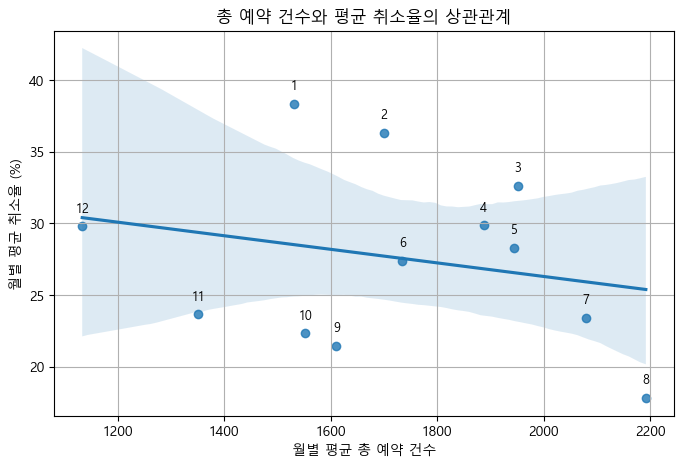

In [1616]:
plt.figure(figsize=(8, 5))
sns.regplot(data=monthly_summary, x='avg_total', y='avg_cancel_rate')

for i in range(len(monthly_summary)):
    plt.text(
        x=monthly_summary['avg_total'][i],
        y=monthly_summary['avg_cancel_rate'][i] + 1,  # 점 위로 살짝 띄우기
        s=str(monthly_summary['month'][i]),
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title("총 예약 건수와 평균 취소율의 상관관계")
plt.xlabel("월별 평균 총 예약 건수")
plt.ylabel("월별 평균 취소율 (%)")
plt.grid(True)
plt.show()

- <span style="color:blue"> 월별로 본다면 사람들이 많이 몰리는 7월달 전후로 예약 건수도 많고, 예약 취소율도 낮다
- <span style="color:blue"> 사람들이 많이 찾고 방문하는 시기일수록 예약 취소율이 낮고 상대적 비수기일때 예약 건수도 낮고 취소율도 높은 경향을 나타낸다.
- <span style="color:blue"> 특히 12~3월 사이의 기간이 예약 취소율이 높기때문에 날씨와 연관지어서 겨울 난방 온도는 적당한가 체크해볼 필요가 있다.
- <span style="color:blue"> 비수기 일때 호텔을 찾는 방문자들에게 호텔 방값을 세일 한다던가 , 혜택을 추가하면 예약 취소율을 낮출수 있다.

## market_segment

In [1619]:
hotel_data_modified_df['market_segment'].value_counts()

market_segment
Online TA        49922
Offline TA/TO    12649
Direct           11358
Corporate         4100
Groups            3741
Complementary      671
Aviation           221
Undefined            2
Name: count, dtype: int64

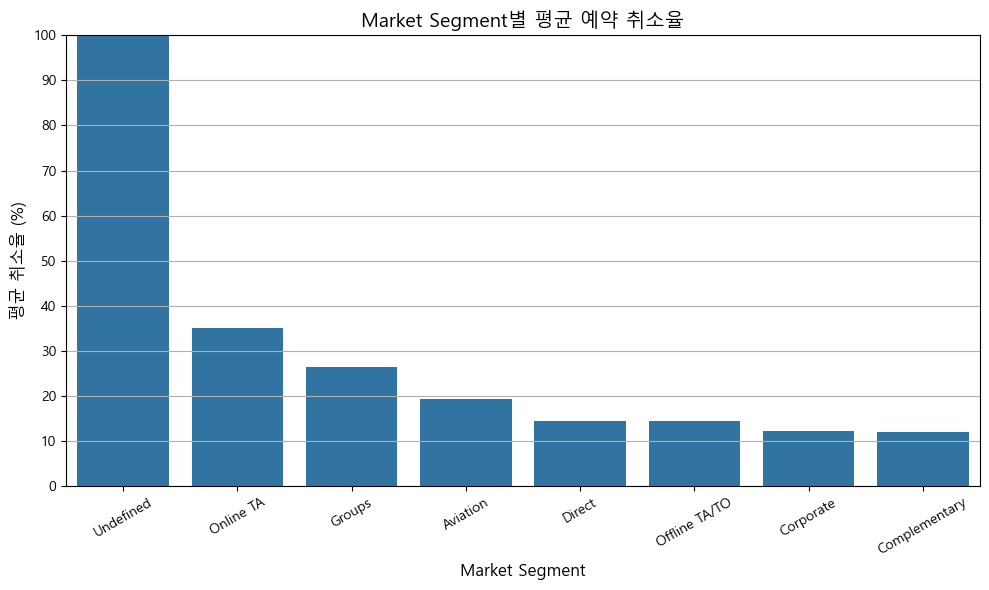

In [1620]:
# 각각의 경우마다 평균 예약 취소율

cancel_rate_by_segment = hotel_data_modified_df.groupby('market_segment')['is_canceled'].mean().reset_index()
cancel_rate_by_segment['cancel_rate_percent'] = (cancel_rate_by_segment['is_canceled'] * 100).round(2)

cancel_rate_by_segment = cancel_rate_by_segment.sort_values(by='cancel_rate_percent', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=cancel_rate_by_segment, x='market_segment', y='cancel_rate_percent')

plt.title("Market Segment별 평균 예약 취소율", fontsize=14)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("평균 취소율 (%)", fontsize=12)
plt.xticks(rotation=30)
plt.yticks(range(0, 101, 10))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- <span style="color:blue"> 온라인 예약의 경우 예약 빈도가 가장 많은 예약 수단이며, 가장 높은 평균 예약 취소율이 나오는 방법 이기도 하다
- <span style="color:blue"> 쉽게 예약이 가능하고 쉽게 예약이 취소가 가능하기때문에 어느정도 이해가 되는 부분이긴 하나 예약 취소율을 낮추기 위해서는
- <span style="color:blue"> 꼭 살펴봐야 하는 방법이기도 하다.

In [1622]:
# Online TA 경우에 / 예약을 취소한 경우 / 데이터를 봤을때 

condition1 = hotel_data_modified_df['market_segment'] == 'Online TA'
condition2 = hotel_data_modified_df['is_canceled'] == 1

group = hotel_data_modified_df[condition1 & condition2]

group.head()

# 여기서 reservations_status_date (마지막 예약상태가 설정된 날짜) 즉 취소날짜가 방문날짜와 얼마나 차이가 나는지에 대한 데이터를 살펴볼 필요가 있다.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,year,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240,0,0,1,Canceled,2015-05-06,2.0,2015,5
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,240,0,0,0,Canceled,2015-06-23,2.0,2015,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,240,0,0,2,Canceled,2015-05-11,2.0,2015,5
34,Resort Hotel,1,45,2015,July,27,2,1,3,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,241,0,0,1,Canceled,2015-05-19,3.0,2015,5
35,Resort Hotel,1,40,2015,July,27,2,1,3,3,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,241,0,0,1,Canceled,2015-06-19,3.0,2015,6


In [1623]:
hotel_data_modified_df['arrival_date_year'].dtype

dtype('int64')

In [1624]:
hotel_data_modified_df['arrival_date_month'].dtype

dtype('O')

In [1625]:
hotel_data_modified_df['arrival_date_day_of_month'].dtype

dtype('int64')

In [1626]:
# 1. 월 이름을 숫자로 변환하기 위한 딕셔너리
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# 2. 월 이름을 숫자로 변환한 새 컬럼 생성
hotel_data_modified_df['arrival_month_num'] = hotel_data_modified_df['arrival_date_month'].map(month_map)

# 3. 날짜 컬럼 생성 (datetime 형식으로)
hotel_data_modified_df['arrival_date'] = pd.to_datetime({
    'year': hotel_data_modified_df['arrival_date_year'],
    'month': hotel_data_modified_df['arrival_month_num'],
    'day': hotel_data_modified_df['arrival_date_day_of_month']
})

In [1627]:
hotel_data_modified_df['reservation_status_date'] = pd.to_datetime(hotel_data_modified_df['reservation_status_date'])

hotel_data_modified_df['days_difference'] = (hotel_data_modified_df['arrival_date'] - hotel_data_modified_df['reservation_status_date']).dt.days


condition1 = hotel_data_modified_df['market_segment'] == 'Online TA'
condition2 = hotel_data_modified_df['is_canceled'] == 1

group = hotel_data_modified_df[condition1 & condition2]

condition3 = (group['days_difference'] >= 0) & (group['days_difference'] < 7)

group[condition3]

group.shape[0]

17529

In [1628]:
condition4 = (group['days_difference'] >= 7) & (group['days_difference'] < 30)

group[condition4].shape[0]

5234

- <span style="color:blue"> 무려 online TA: 50820 의 데이터 중에서 호텔 예약 일주일 안에 예약을 취소한 경우만 18150 건이나 된다
- <span style="color:blue"> 인터넷 예약의 경우 예약일을 기준으로 기간별로 예약 취소를 할시 위약금을 물게 한다던가 하는 방법을 적용을 하면 예약 취소율을 낮출수 있다.
- <span style="color:blue"> 인터넷 예약시 위와 같은 위약금이 존재함을 미리 고지하고 알린다.

## distribution_channel

In [1631]:
hotel_data_modified_df['distribution_channel'].value_counts()

distribution_channel
TA/TO        65375
Direct       12302
Corporate     4804
GDS            178
Undefined        5
Name: count, dtype: int64

In [1632]:
group = hotel_data_modified_df.groupby('distribution_channel')['is_canceled'].mean()

group.head()

distribution_channel
Corporate    0.129267
Direct       0.147456
GDS          0.202247
TA/TO        0.308145
Undefined    0.800000
Name: is_canceled, dtype: float64

In [1633]:
hotel_data_modified_df['is_canceled'].mean()

0.27363785928578344

- <span style="color:blue">대다수의 고객들이 여행사나 투어를 통해서 호텔을 예약하지만, 이런경우의 예약 취소율 또한 평균보다 약 4%가량 높다
- <span style="color:blue">즉 TA/TO 를 통한 호텔 예약에서 발생하는 문제점에 대해 분석을 하고 해결을 한다면 예약 취소율을 높일수 있을 것이다.

In [1635]:
group = hotel_data_modified_df[hotel_data_modified_df['distribution_channel'] == 'TA/TO']
group.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_people,year,month,arrival_month_num,arrival_date,days_difference
count,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375.000000,65375,65375.000000,65375.000000,65375.000000,65375.000000,65375,65375.000000
mean,0.308145,79.941690,2016.218998,26.721438,15.806792,1.060375,2.717813,1.933354,0.143572,0.009025,0.011946,0.019518,0.028237,0.223143,0.658386,0.066738,0.763228,2016-09-01 06:23:01.408795392,2.085950,2016.194799,6.210891,6.450096,2016-09-17 09:31:48.894837504,16.131105
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,1.000000,2014.000000,1.000000,1.000000,2015-07-01 00:00:00,-56.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-03-22 00:00:00,2.000000,2016.000000,4.000000,4.000000,2016-04-08 00:00:00,-4.000000
50%,0.000000,58.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016-09-05 00:00:00,2.000000,2016.000000,6.000000,7.000000,2016-09-19 00:00:00,-2.000000
75%,1.000000,127.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017-03-06 00:00:00,2.000000,2017.000000,9.000000,9.000000,2017-04-04 00:00:00,9.000000
max,1.000000,293.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,4.000000,10.000000,10.000000,1.000000,26.000000,25.000000,17.000000,259.000000,2.000000,5.000000,2017-09-14 00:00:00,12.000000,2017.000000,12.000000,12.000000,2017-08-31 00:00:00,293.000000
std,0.461730,72.917573,0.680300,13.451215,8.842251,1.015684,1.992131,0.473171,0.463830,0.102488,0.108646,0.332260,0.412983,0.664387,8.505820,0.250793,0.831214,NaN,0.668785,0.673732,3.202871,3.045104,NaN,45.450441


In [1636]:
group['meal'].value_counts()

meal
BB    49395
SC     8739
HB     7005
FB      236
Name: count, dtype: int64

In [1637]:
8857/group['meal'].shape[0]

0.13547992351816443

In [1638]:
hotel_data_modified_df[hotel_data_modified_df['meal'] == 'SC'].shape[0]/hotel_data_modified_df['meal'].shape[0]

0.11090680344527243

## children

In [1640]:
hotel_data_modified_df['children'].describe()

count    82660.000000
mean         0.140721
std          0.459190
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [1641]:
# 결손값 처리
hotel_data_modified_df = hotel_data_modified_df.dropna(subset=['children'])

In [1642]:
hotel_data_modified_df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           437
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
agent                               0
days_in_waiting_list                0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

## country

In [1644]:
hotel_data_modified_df['country'].isna().sum()  # 437개의 country 결손값 존재

437

In [1645]:
hotel_data_modified_df = hotel_data_modified_df.dropna(subset=['country']) # 결손값 처리

In [1646]:
hotel_data_modified_df['country'].value_counts()

country
PRT    25543
GBR     9490
FRA     8582
ESP     6970
DEU     5106
       ...  
GLP        1
UMI        1
MMR        1
BFA        1
FRO        1
Name: count, Length: 176, dtype: int64

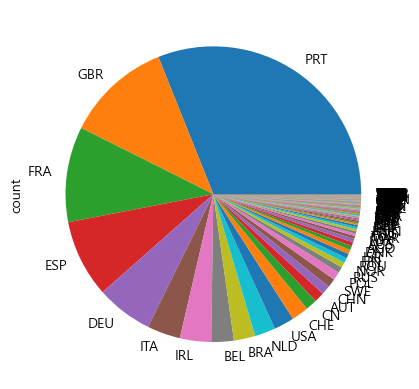

In [1647]:
hotel_data_modified_df['country'].value_counts().plot(kind='pie')
plt.show()

In [1648]:
hotel_data_modified_df['country'].describe()

count     82223
unique      176
top         PRT
freq      25543
Name: country, dtype: object

In [1649]:
# PRT(포르투갈) , GBR(영국) , FRA(프랑스), ESP(스페인) , DEU(독일) 나라순으로 호텔을 많이 예약 한다

In [1650]:
country_counts = hotel_data_modified_df['country'].value_counts().rename("reservation_count")
country_lead_time = hotel_data_modified_df.groupby('country')['lead_time'].mean().rename("average_lead_time")

country_analysis = pd.concat([country_counts, country_lead_time], axis=1)
country_analysis = country_analysis.dropna()  # 혹시 평균에 NaN 있는 경우 제거

correlation = country_analysis['reservation_count'].corr(country_analysis['average_lead_time'])
print("상관계수:", correlation)

상관계수: 0.019610228070629197


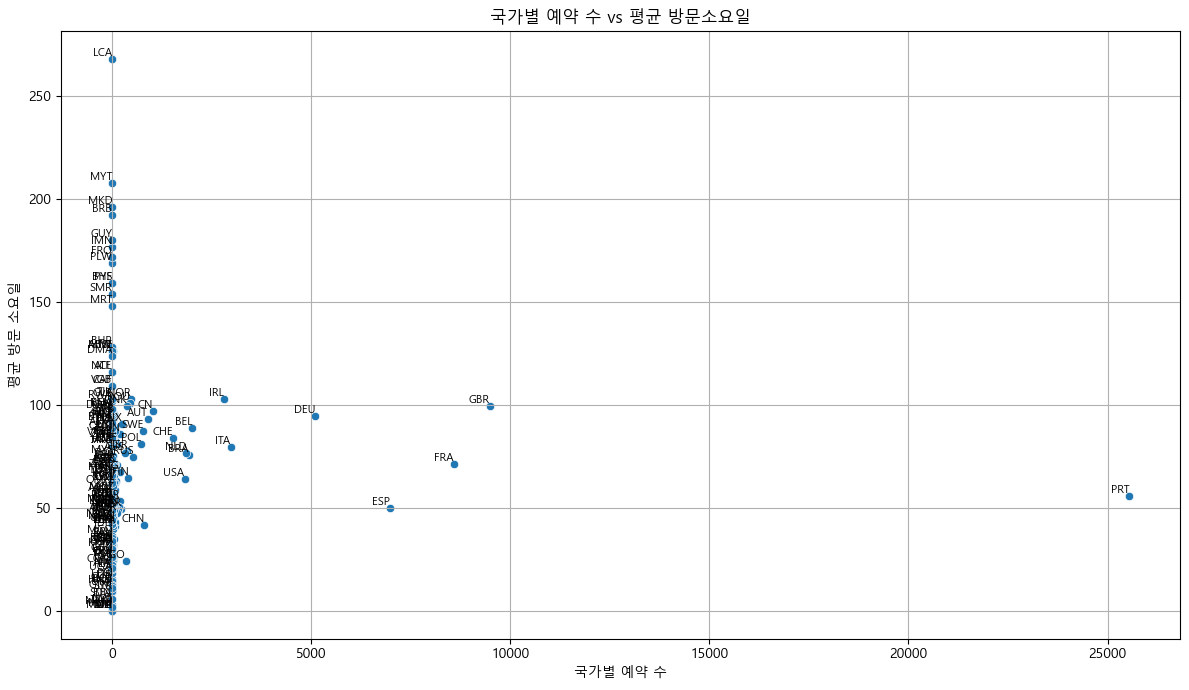

In [1651]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=country_analysis, x='reservation_count', y='average_lead_time')

# 각 점 위에 나라 이름 표시
for country, row in country_analysis.iterrows():
    plt.text(row['reservation_count'], row['average_lead_time'], country,
             fontsize=8, ha='right', va='bottom')  # 위치와 글씨 조정

plt.title("국가별 예약 수 vs 평균 방문소요일")
plt.xlabel("국가별 예약 수")
plt.ylabel("평균 방문 소요일")
plt.grid(True)
plt.tight_layout()
plt.show()

- <span style="color:blue"> 예약이 많은 나라인것과 평균 방문 소요일과의 연관성은 낮다

## lead_time

<Axes: >

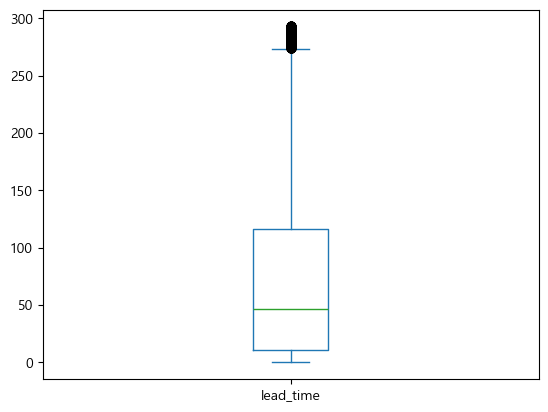

In [1654]:
hotel_data_modified_df['lead_time'].plot(kind = 'box')

In [1655]:
# lead_time 이상치 제거
q1 = hotel_data_modified_df['lead_time'].quantile(0.25)
q3 = hotel_data_modified_df['lead_time'].quantile(0.75)
iqr = q3 - q1

hotel_data_modified_df = hotel_data_modified_df[hotel_data_modified_df['lead_time'] < q3 + 1.5*iqr]

In [1656]:
# lead_time = 0 인 경우
hotel_data_modified_df[hotel_data_modified_df['lead_time'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,year,month,arrival_month_num,arrival_date,days_difference
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,unknown,0,0,0,Check-Out,2015-07-03,2.0,2015,7,7,2015-07-01,-2
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,unknown,0,0,0,Check-Out,2015-07-02,2.0,2015,7,7,2015-07-01,-1
56,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,unknown,0,0,0,Check-Out,2015-07-03,2.0,2015,7,7,2015-07-02,-1
57,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,240,0,0,2,Check-Out,2015-07-03,2.0,2015,7,7,2015-07-02,-1
58,Resort Hotel,0,0,2015,July,27,2,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,G,G,0,unknown,0,0,0,Check-Out,2015-07-03,2.0,2015,7,7,2015-07-02,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,City Hotel,0,0,2017,August,35,29,0,1,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,9,0,0,0,Check-Out,2017-08-30,2.0,2017,8,8,2017-08-29,-1
119138,City Hotel,0,0,2017,August,34,23,2,5,2,0.0,0,HB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,394,0,0,0,Check-Out,2017-08-30,2.0,2017,8,8,2017-08-23,-7
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2.0,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,unknown,0,0,0,Check-Out,2017-08-30,4.0,2017,8,8,2017-08-29,-1
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0.0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,unknown,0,0,0,Check-Out,2017-08-31,1.0,2017,8,8,2017-08-30,-1


In [1657]:
# lead_time = 0 즉 당일날 예약해서 당일날 도착을 한 경우 취소율이 낮아 보이는데 어떤 연관 관계가 있을까?

In [1658]:
condition1 = hotel_data_modified_df['lead_time'] == 0
condition2 = hotel_data_modified_df['is_canceled'] !=0
hotel_data_modified_df[condition1 & condition2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,year,month,arrival_month_num,arrival_date,days_difference
438,Resort Hotel,1,0,2015,July,29,16,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,241,0,0,0,Canceled,2015-07-16,2.0,2015,7,7,2015-07-16,0
504,Resort Hotel,1,0,2015,July,29,17,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,L,C,0,unknown,0,0,0,Canceled,2015-07-17,2.0,2015,7,7,2015-07-17,0
796,Resort Hotel,1,0,2015,July,31,30,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,unknown,0,0,0,Canceled,2015-07-30,1.0,2015,7,7,2015-07-30,0
909,Resort Hotel,1,0,2015,August,32,5,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,F,0,unknown,0,0,1,Canceled,2015-08-05,2.0,2015,8,8,2015-08-05,0
1472,Resort Hotel,1,0,2015,August,36,31,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,242,0,0,1,No-Show,2015-08-31,2.0,2015,8,8,2015-08-31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98809,City Hotel,1,0,2016,December,51,12,1,0,2,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,341,0,0,2,Canceled,2016-12-12,2.0,2016,12,12,2016-12-12,0
98810,City Hotel,1,0,2016,December,51,12,1,0,2,0.0,0,BB,PRT,Complementary,Corporate,1,0,1,A,A,0,341,0,0,2,Canceled,2016-12-12,2.0,2016,12,12,2016-12-12,0
101930,City Hotel,1,0,2017,June,26,29,0,1,2,0.0,0,BB,PRT,Complementary,Direct,1,0,1,A,D,0,45,0,0,0,Canceled,2017-06-29,2.0,2017,6,6,2017-06-29,0
105909,City Hotel,1,0,2017,April,16,18,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,0,2,A,A,0,unknown,0,0,2,Canceled,2017-04-18,1.0,2017,4,4,2017-04-18,0


In [1659]:
hotel_data_modified_df[hotel_data_modified_df['lead_time'] == 0].groupby('is_canceled').size()

is_canceled
0    5188
1     335
dtype: int64

In [1805]:
335/5188

0.06457208943716268

In [1661]:
hotel_data_modified_df['is_canceled'].mean()

0.27312385563488456

- <span style="color:blue">평균 예약 취소율이 27%인데 당일 예약 후 방문의 경우 취소율이 6%로 현저히 낮다는 것을 알 수 있다.

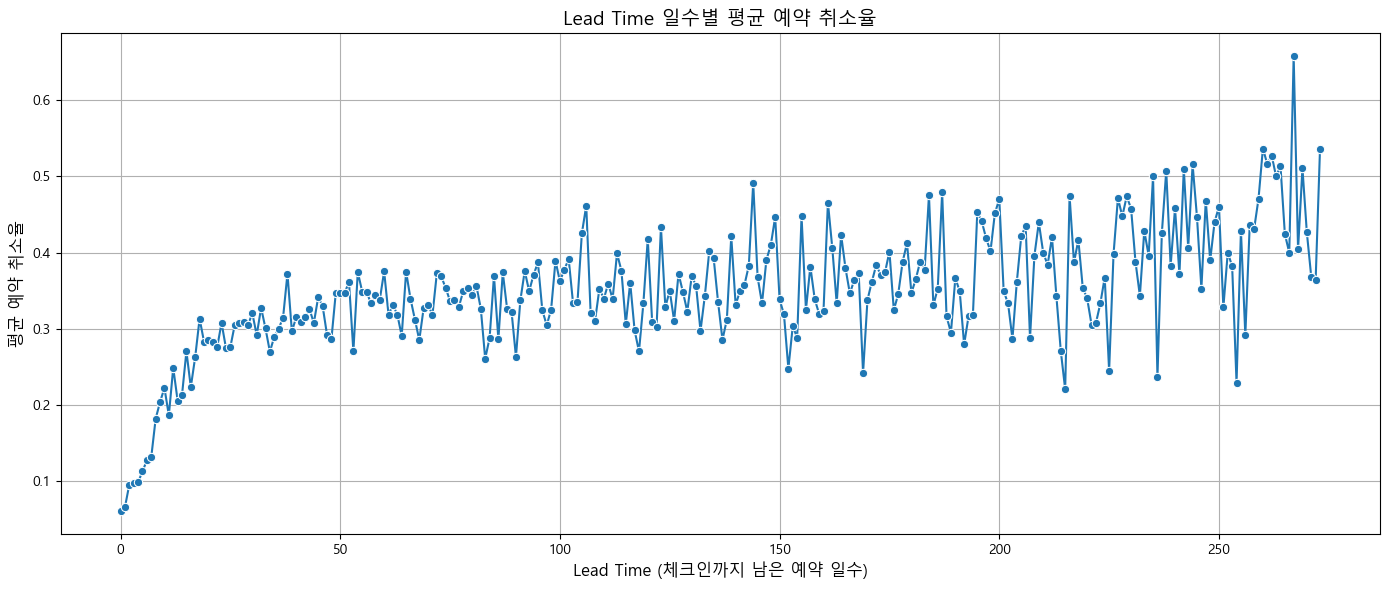

In [1663]:
cancel_rate_by_lead_time = hotel_data_modified_df.groupby('lead_time')['is_canceled'].mean().reset_index()
cancel_rate_by_lead_time = cancel_rate_by_lead_time.sort_values(by='lead_time')

plt.figure(figsize=(14, 6))
sns.lineplot(data=cancel_rate_by_lead_time, x='lead_time', y='is_canceled', marker='o')

plt.title("Lead Time 일수별 평균 예약 취소율", fontsize=14)
plt.xlabel("Lead Time (체크인까지 남은 예약 일수)", fontsize=12)
plt.ylabel("평균 예약 취소율", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

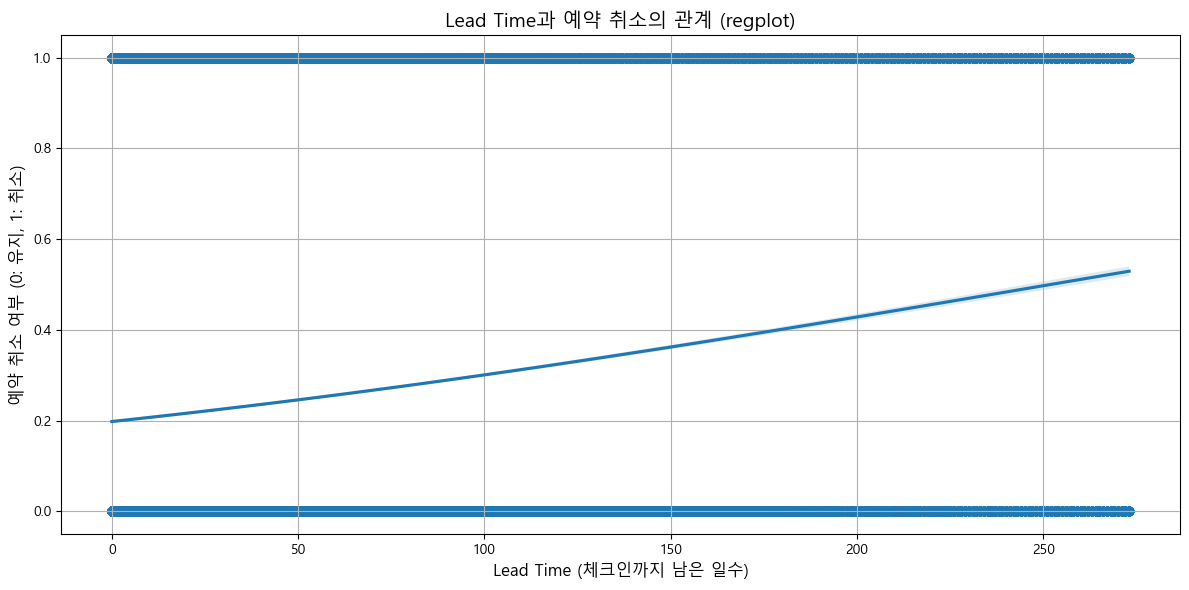

In [1664]:
plt.figure(figsize=(12, 6))
sns.regplot(
    data=hotel_data_modified_df,
    x='lead_time',
    y='is_canceled',
    logistic=True     # is_canceled이 이진값이므로 로지스틱 회귀 사용
)

plt.title("Lead Time과 예약 취소의 관계 (regplot)", fontsize=14)
plt.xlabel("Lead Time (체크인까지 남은 일수)", fontsize=12)
plt.ylabel("예약 취소 여부 (0: 유지, 1: 취소)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

- <span style="color:blue">Lead_Time 이 길수록 평균 예약 취소율이 올라 간다
- <span style="color:blue">Lead_Time 이 긴 고객의 취소율을 낮추기 위한 전략으로
1. 리마인드 & 재확인 시스템
2. 부분 선결제 또는 보증금 제도 도입
3. 미리 예약하신 고객분들에게 인센티브 제공
4. 예약 취소대신 날짜 변경 옵션 강조
5. 고위험Lead_Time 구간 고객을 사전 시벽& 타겟 관리

### heatmap을 통한 분석

<Axes: >

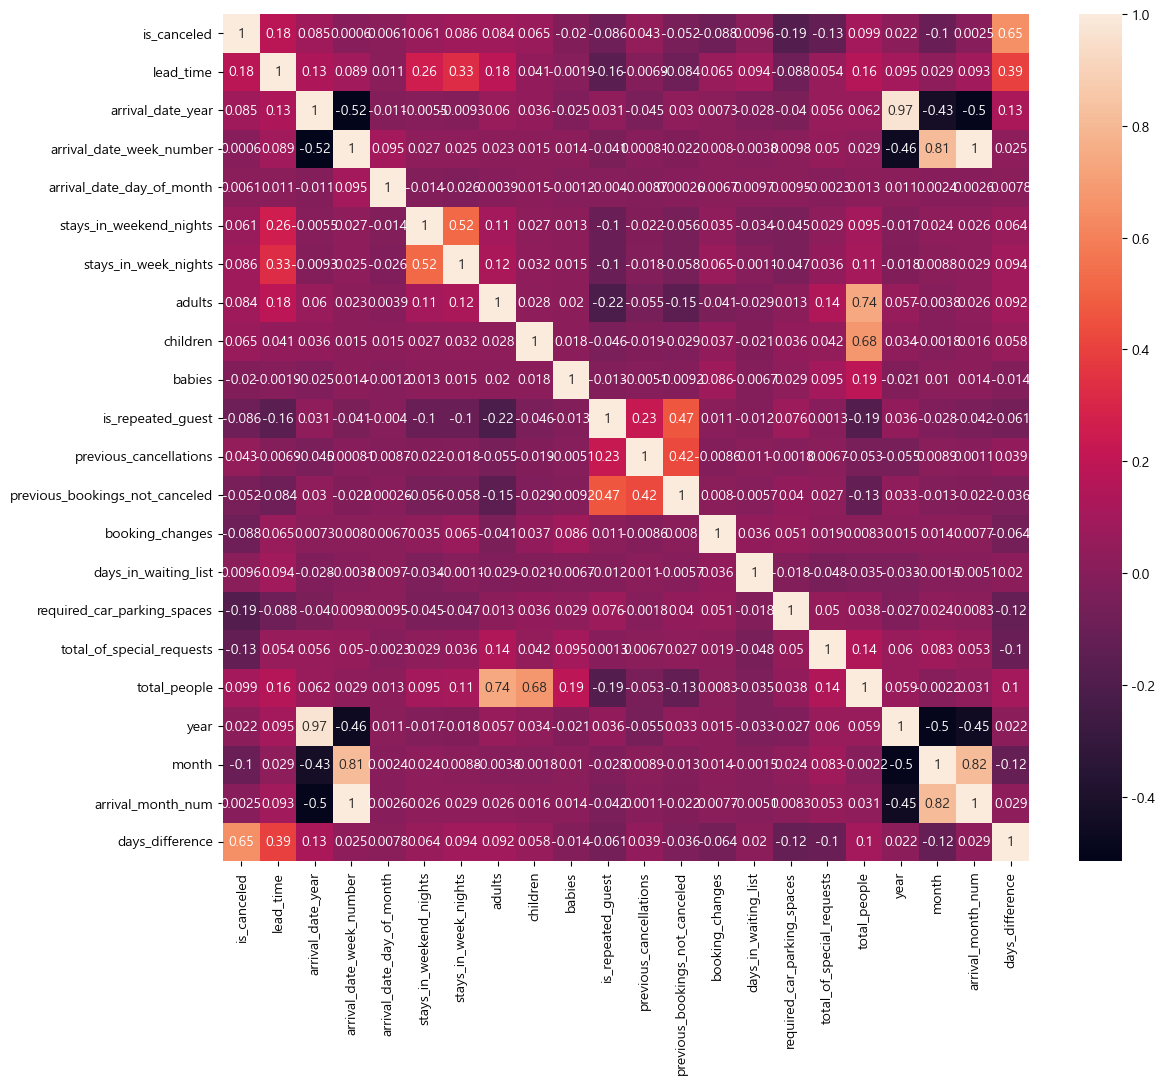

In [1667]:
plt.figure(figsize=(13, 11))
sns.heatmap(hotel_data_modified_df.corr(numeric_only=True),annot=True)